From 8

In [2]:
from openai import OpenAI
import pandas as pd
client = OpenAI()

df = pd.read_csv('verbs.csv')

def translate_verb(arb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of LLMs on Darija," +
             "making sure that the language accounts for particular nuances of the language such as emphasis and articulation."+
             "Target audience: Darija Computational linguists."
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect verb into English using word-by-word translation."             },
            {"role": "assistant", "content": "OK, I understand. I am ready for the verb translation."},
            {"role": "user", "content": "ولّا"},
            {"role": "assistant", "content": "become"},
            {"role": "user", "content": "ستدعا"},
            {"role": "assistant", "content": "summon"},
            {"role": "user", "content": "با"},
            {"role": "assistant", "content": "want"},
            {"role": "user", "content": "عنا"},
            {"role": "assistant", "content": "mean"},
            {"role": "user", "content": "شدّ"},
            {"role": "assistant", "content": "hold"},
            {"role": "user", "content": "غضب"},
            {"role": "assistant", "content": "anger"},
            {"role": "user", "content": "دار"},
            {"role": "assistant", "content": "do"},
            {"role": "user", "content": "عندو"},
            {"role": "assistant", "content": "have"},  
            {"role": "user", "content": "تسخسخ"},
            {"role": "assistant", "content": "exhaust"},
            {"role": "user", "content": "سلت"},
            {"role": "assistant", "content": "take off"},
            {"role": "user", "content": "تاوا"},
            {"role": "assistant", "content": "bargain"},
            {"role": "user", "content": "عام"},
            {"role": "assistant", "content": "swim"},
            {"role": "user", "content": "طلع"},
            {"role": "assistant", "content": "ascend"},
            {"role": "user", "content": "نقّص"},
            {"role": "assistant", "content": "reduce"},
            {"role": "user", "content": "قاس"},            
            {"role": "assistant", "content": "touch"},
            {"role": "user", "content":  f"{arb}" }
            ], 
            #
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
df['transl'] = df['darija_ar'].apply(translate_verb)

print(df["transl"])

0              eat
1            drink
2            enter
3             exit
4       understand
           ...    
1027        inform
1028      turn off
1029         smell
1030         cheat
1031          peel
Name: transl, Length: 1032, dtype: object


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[(2, 'eat', 'eat', 1.0, True), (3, 'drink', 'drink', 1.0000001192092896, True), (4, 'enter', 'enter', 0.9999999403953552, True), (5, 'exit', 'go out', 0.9226919412612915, True), (6, 'understand', 'understand', 0.9999998211860657, True), (7, 'explain', 'explain', 0.9999999403953552, True), (8, 'read', 'learn', 0.8049945831298828, True), (9, 'read', 'teach', 0.77842777967453, True), (10, 'hear', 'hear', 1.0000001192092896, True), (11, 'see', 'see', 0.9999998807907104, True), (12, 'smell', 'smell', 1.0, True), (13, 'taste', 'taste', 0.9999998807907104, True), (14, 'measure', 'touch', 0.7711687684059143, True), (15, 'go', 'go', 0.9999998807907104, True), (16, 'come', 'come', 1.0, True), (17, 'go out', 'ascend', 0.6200301051139832, False), (18, 'descend', 'go down', 0.7887939214706421, True), (19, 'swim', 'swim', 1.0000001192092896, True), (20, 'drown', 'drown', 0.9999998807907104, True), (21, 'wear', 'wear', 1.0000001192092896, True), (22, 'ask', 'take off', 0.6565431952476501, False), (23

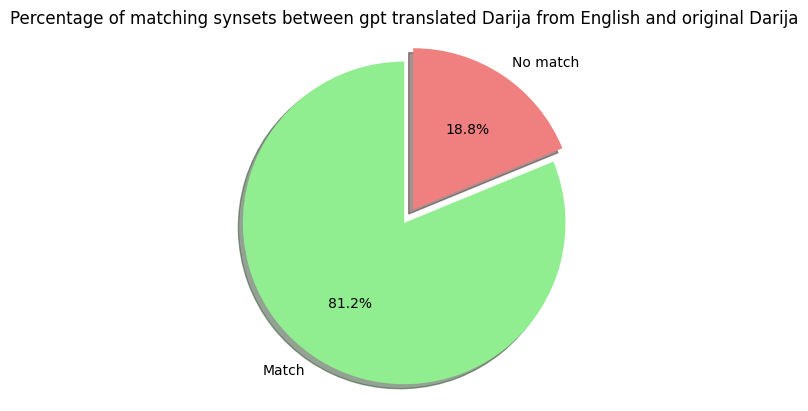

In [3]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

model_name = 'bert-base-nli-mean-tokens'
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer(model_name)


transl = df['transl']
eng = df['eng']

results = []
def evaluate_pairs(transl, eng, threshold=0.7):
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2)
        results.append((i+2, sentence1, sentence2, similarity.item(), similarity.item() >= threshold))
    return results
results = evaluate_pairs(transl, eng)
print(results)



# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")

plt.show()

18, 'descend', 'go down', 0.7887939214706421, True

14, 'measure', 'touch', 0.7711687684059143, True,

27, 'wipe', 'clean', 0.6921836137771606, False

30, 'tire', 'fatigue', 0.6870269775390625, False